In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/breast-cancer-wisconsin-data")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/datasets/organizations/uciml/breast-cancer-wisconsin-data


loading csv from kaggle

In [2]:
import os
os.makedirs("results", exist_ok=True)

In [3]:
import os
import pandas as pd

# Show files inside dataset folder
print(os.listdir(path))



['data.csv']


In [4]:
csv_path = os.path.join(path, "data.csv")

df = pd.read_csv(csv_path)

print(df.shape)
df.head()


(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [6]:
df = df.drop(columns=["id", "Unnamed: 32"], errors="ignore")

print(df.shape)


(569, 31)


In [7]:
df["diagnosis"].head()
df["diagnosis"].unique()


array(['M', 'B'], dtype=object)

In [8]:
df["diagnosis"] = df["diagnosis"].map({"M": 0, "B": 1})


In [9]:
df["diagnosis"].value_counts()

diagnosis
1    357
0    212
Name: count, dtype: int64

**Train/Test + Scaling + Model**

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Features and target
X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model
model = LogisticRegression(max_iter=500)
model.fit(X_train_scaled, y_train)

# Predict
y_pred = model.predict(X_test_scaled)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9824561403508771

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [11]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "SVM (RBF)": SVC(kernel="rbf", probability=True),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "MLP Neural Net": MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=2000, random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    
    print(f"\n{name}")
    print("Accuracy:", acc)



Logistic Regression
Accuracy: 0.9824561403508771

SVM (RBF)
Accuracy: 0.9824561403508771

Random Forest
Accuracy: 0.956140350877193

MLP Neural Net
Accuracy: 0.9649122807017544


In [12]:
import pandas as pd

results_df = pd.DataFrame.from_dict(results, orient="index", columns=["Accuracy"])
results_df = results_df.sort_values(by="Accuracy", ascending=False)

results_df


,Accuracy
Logistic Regression,0.982456
SVM (RBF),0.982456
MLP Neural Net,0.964912
Random Forest,0.956140


In [13]:
results_df.to_csv("results/model_comparison.csv")

In [14]:
rf = models["Random Forest"]

importances = rf.feature_importances_
features = X.columns

importance_df = (
    pd.DataFrame({"Feature": features, "Importance": importances})
    .sort_values(by="Importance", ascending=False)
)

importance_df.head(10)


,Feature,Importance
22,perimeter_worst,0.133100
23,area_worst,0.128052
27,concave points_worst,0.108107
7,concave points_mean,0.094414
20,radius_worst,0.090639
0,radius_mean,0.058662
2,perimeter_mean,0.055242
3,area_mean,0.049938
6,concavity_mean,0.046207
26,concavity_worst,0.035357


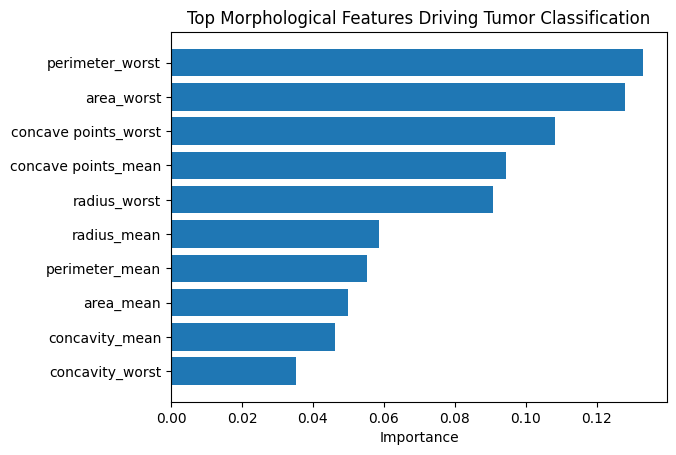

In [15]:
import matplotlib.pyplot as plt

top_n = 10
top_features = importance_df.head(top_n)

plt.figure()
plt.barh(top_features["Feature"], top_features["Importance"])
plt.gca().invert_yaxis()
plt.title("Top Morphological Features Driving Tumor Classification")
plt.xlabel("Importance")
plt.show()


In [16]:
plt.savefig("results/feature_importance.png", dpi=300)


<Figure size 640x480 with 0 Axes>

In [17]:
import joblib

joblib.dump(model, "breast_cancer_model.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [19]:
import os

base = "/kaggle/working/breast-cancer-perception"

folders = [
    "data",
    "models",
    "results",
    "src",
    "notebooks"
]

for f in folders:
    os.makedirs(os.path.join(base, f), exist_ok=True)

print("Created:", os.listdir(base))


Created: ['src', 'notebooks', 'models', 'results', 'data']


In [20]:
import joblib

# Save model
joblib.dump(model, f"{base}/models/breast_cancer_model.pkl")
joblib.dump(scaler, f"{base}/models/scaler.pkl")

# Save comparison table
results_df.to_csv(f"{base}/results/model_comparison.csv")

# Save plot
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.barh(top_features["Feature"], top_features["Importance"])
plt.gca().invert_yaxis()
plt.title("Top Morphological Features Driving Tumor Classification")
plt.xlabel("Importance")
plt.tight_layout()
plt.savefig(f"{base}/results/feature_importance.png", dpi=300)
plt.close()

print("Saved project files")


Saved project files


In [21]:
import shutil
shutil.copy(csv_path, f"{base}/data/data.csv")


'/kaggle/working/breast-cancer-perception/data/data.csv'

In [23]:
readme = """# Breast Cancer Artificial Perception System

This project builds an artificial perception system to classify breast tumors as benign or malignant using morphological features extracted from digitized biopsy images.

## Models
- Logistic Regression
- Support Vector Machine
- Random Forest
- Neural Network

Best accuracy: 98.2%

## Structure
data/ dataset  
models/ trained model + scaler  
results/ figures and metrics  
src/ code  

## Usage
pip install -r requirements.txt
"""

with open(f"{base}/README.md", "w") as f:
    f.write(readme)


In [24]:
import shutil
shutil.make_archive("/kaggle/working/breast-cancer-perception", "zip", base)


'/kaggle/working/breast-cancer-perception.zip'